In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

In [3]:
REL_df = pd.DataFrame(data.DataReader('BSE/BOM500325', 'quandl', start=start, end=end ))

In [4]:
REL_df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-07-27,1117.20,1137.00,1112.80,1129.60,1127.61,447361.0,9677.0,5.044475e+08,132729.0,29.67,24.20,12.40
2018-07-26,1113.00,1121.00,1107.70,1110.35,1114.83,154028.0,4490.0,1.717154e+08,60309.0,39.15,13.30,-2.65
2018-07-25,1112.25,1122.30,1104.55,1114.05,1116.14,265010.0,5802.0,2.957879e+08,102790.0,38.79,17.75,1.80
2018-07-24,1122.00,1126.10,1107.65,1110.55,1115.07,305391.0,5790.0,3.405311e+08,135804.0,44.47,18.45,-11.45
2018-07-23,1129.70,1130.00,1114.00,1120.15,1119.63,205750.0,4704.0,2.303636e+08,69915.0,33.98,16.00,-9.55
2018-07-20,1110.50,1138.25,1110.50,1128.55,1125.24,446801.0,12094.0,5.027599e+08,109831.0,24.58,27.75,18.05
2018-07-19,1095.00,1114.00,1086.80,1103.90,1094.77,778552.0,9443.0,8.523378e+08,475172.0,61.03,27.20,8.90
2018-07-18,1097.90,1104.50,1079.00,1090.55,1091.01,278593.0,6239.0,3.039484e+08,68116.0,24.45,25.50,-7.35
2018-07-17,1079.00,1095.00,1069.15,1091.70,1085.89,287860.0,7215.0,3.125831e+08,65358.0,22.70,25.85,12.70


# Candle Stick Presentation

In [5]:
from matplotlib import dates, ticker
# from matplotlib.finance import candlestick2_ochl
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [6]:
REL_df['Date'] = REL_df.index.map(mdates.date2num)
ohlc =REL_df[['Date','Open','High','Low','Close']]

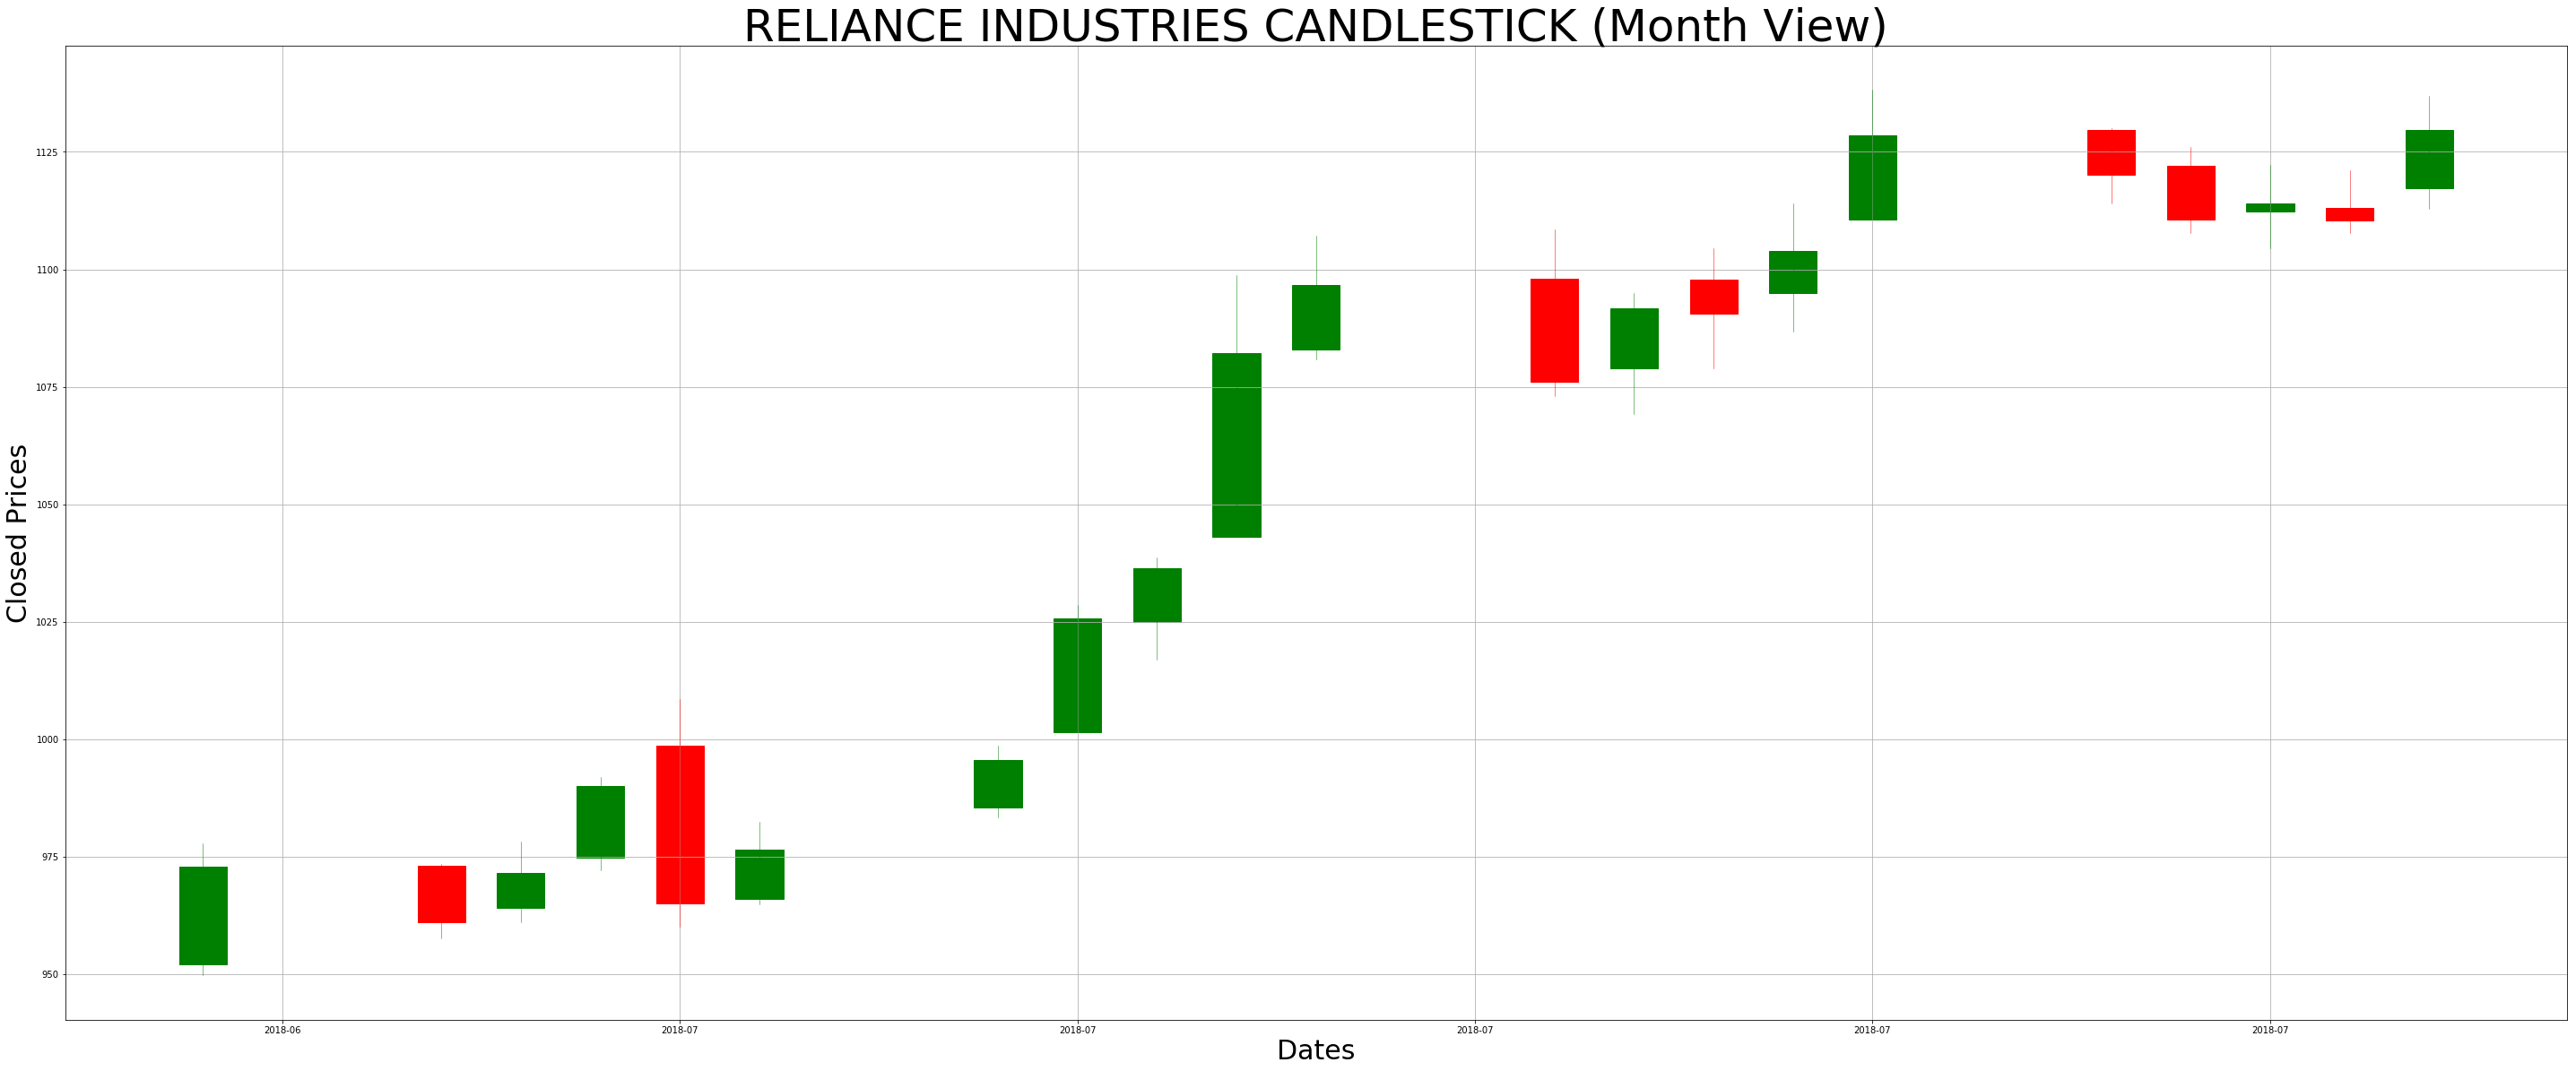

In [7]:
fig, ax = pt.subplots(figsize = (50,20))
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30)
ax.set_ylabel('Closed Prices', size=30)
ax.set_title('RELIANCE INDUSTRIES CANDLESTICK (Month View)', size=50)
pt.savefig("RELIANCE INDUSTRIES CANDLESTICK one month from today")
ax.grid(True)
pt.show()

# Volume

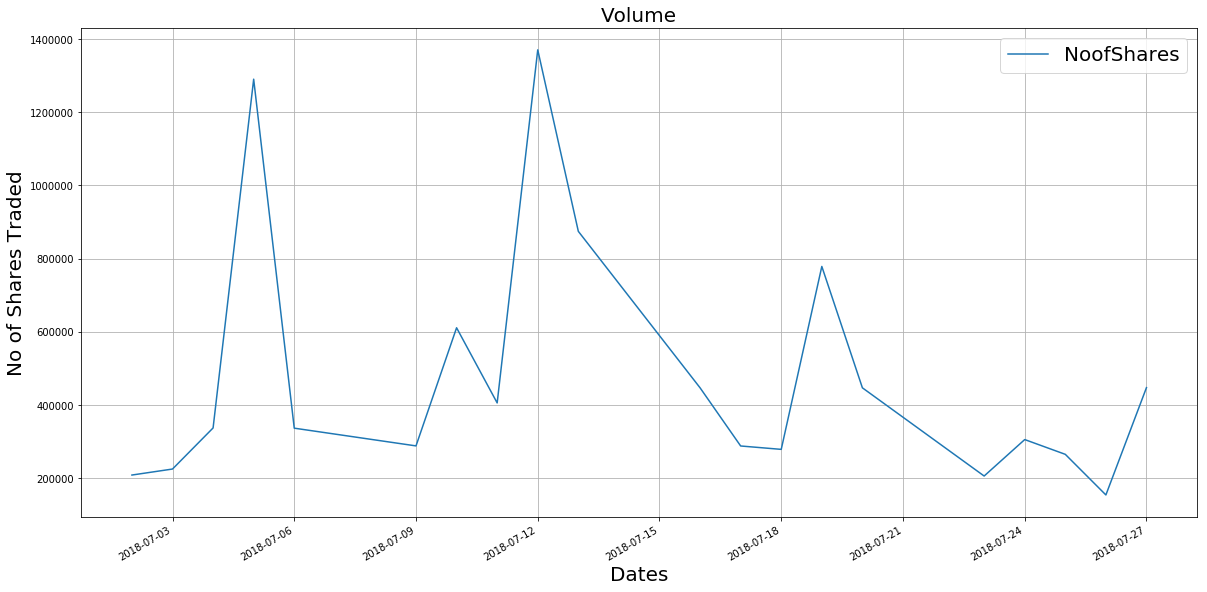

In [56]:
fig, bx = pt.subplots(figsize = (20,10))
REL_df['NoofShares'].plot(legend=True)
bx.set_xlabel('Dates',size=30, fontsize=20)
bx.set_ylabel('No of Shares Traded', size=20)
bx.set_title('Volume', size=20)
pt.legend(prop={'size':20})
bx.grid(True)
pt.show()

# Volume Weighted Avg Prices and Comparision

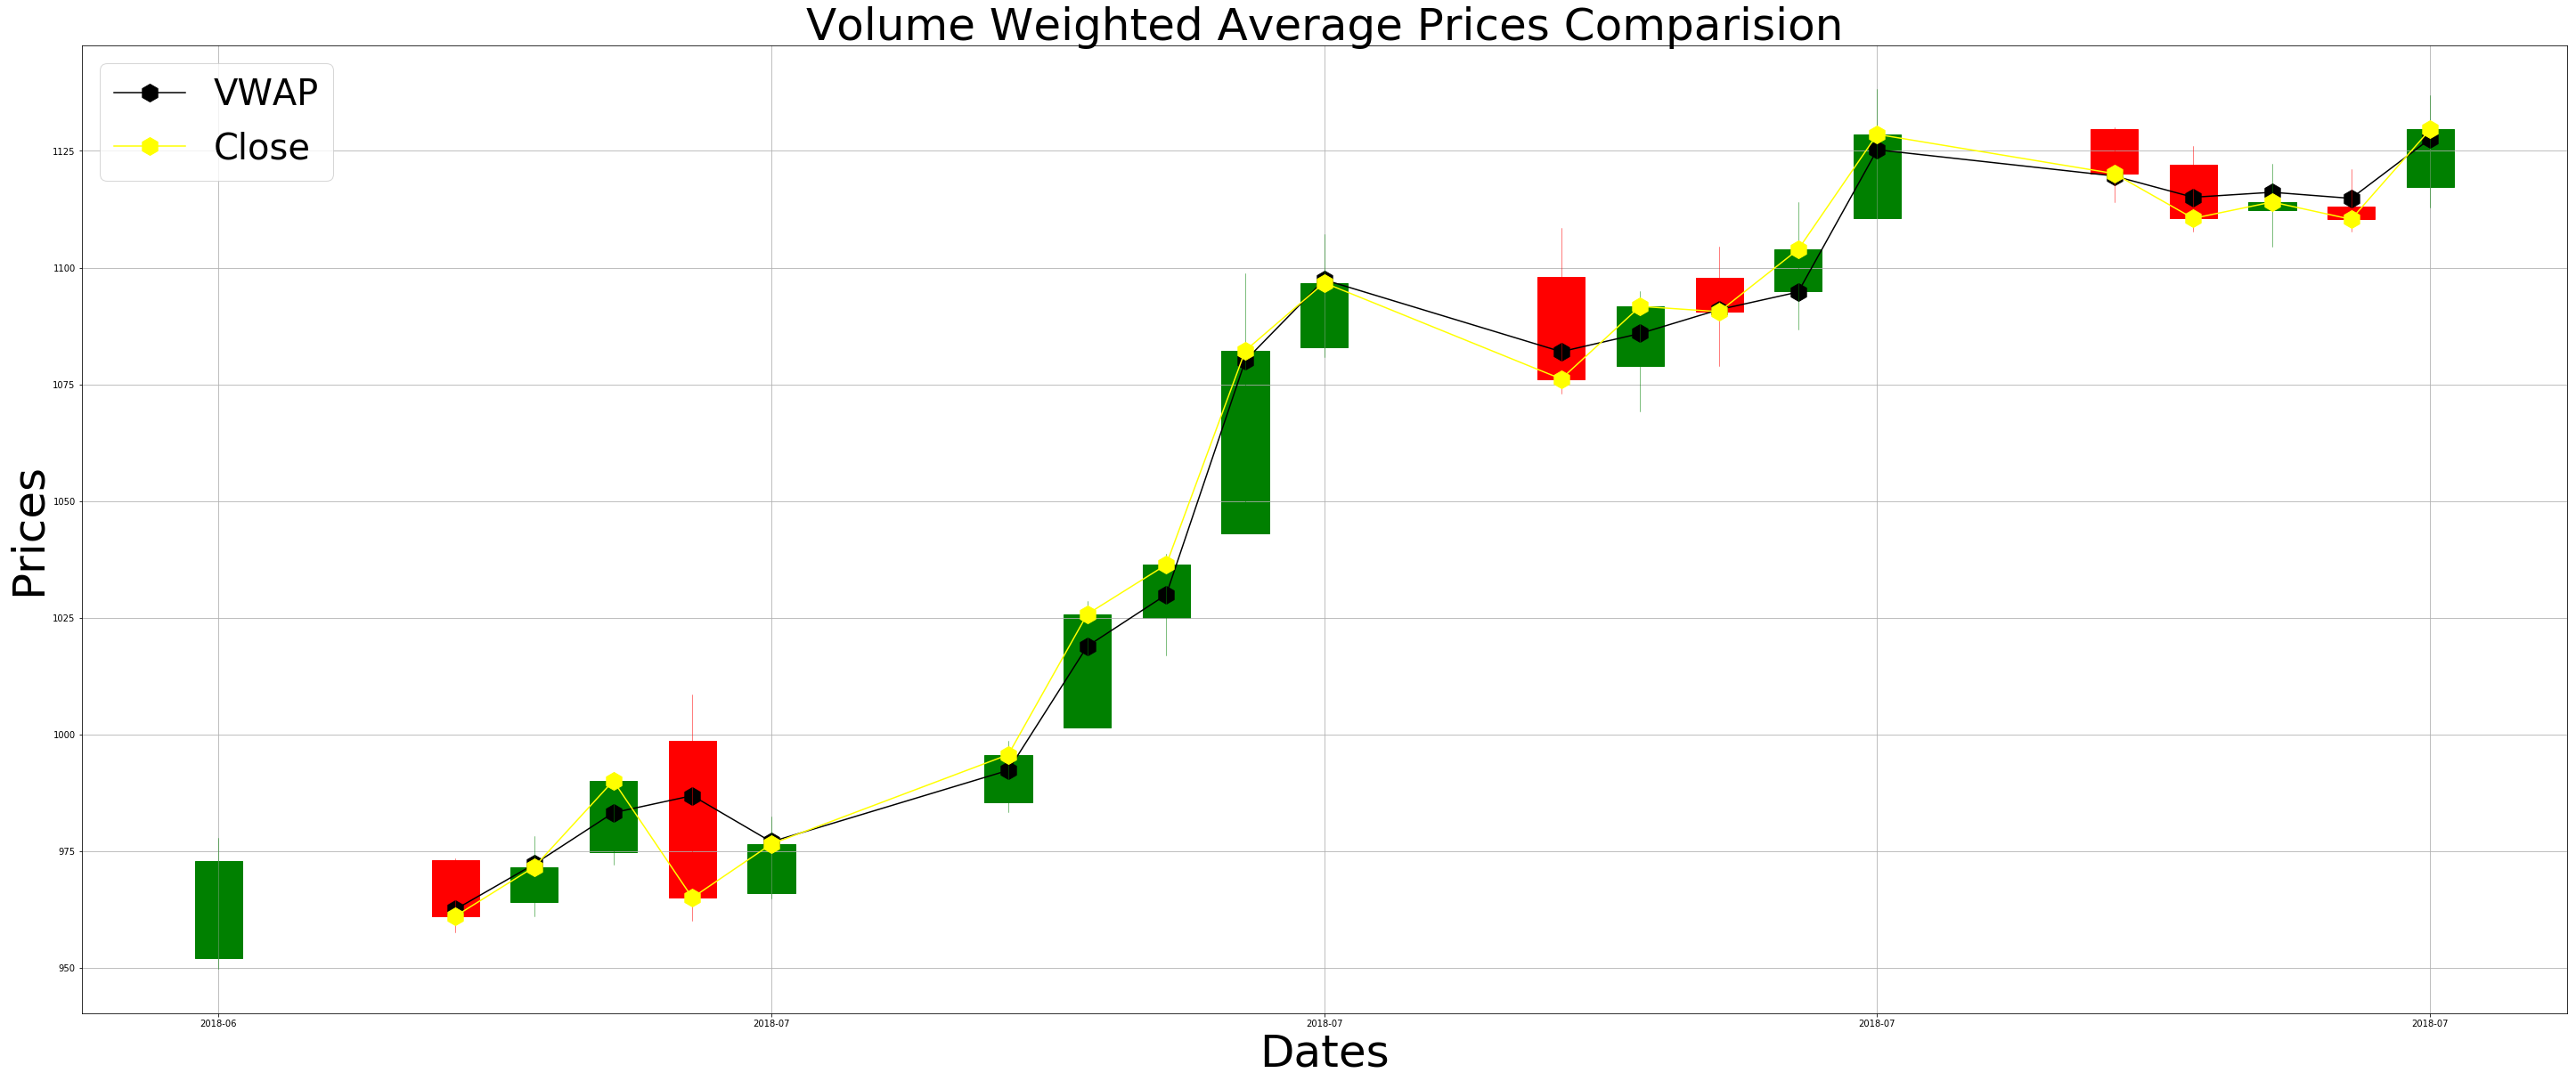

In [67]:
fig, Qx = pt.subplots(figsize = (50,20))
Qx.plot(REL_df.index, REL_df['WAP'], color = 'black', label = 'VWAP', marker='h', markersize=20)
# plot the candlesticks
candlestick_ohlc(Qx, ohlc.values, width=.6, colorup='green', colordown='red')

Qx.plot(REL_df.index, REL_df['Close'], color = 'yellow', label = 'Close', marker='h', markersize=20)
Qx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
Qx.set_xlabel('Dates',size=50)
Qx.set_ylabel('Prices', size=50)
Qx.set_title('Volume Weighted Average Prices Comparision', size=50)
Qx.grid(True)
Qx.legend()
pt.legend(prop={'size':40})
pt.show()

# Total Turnover

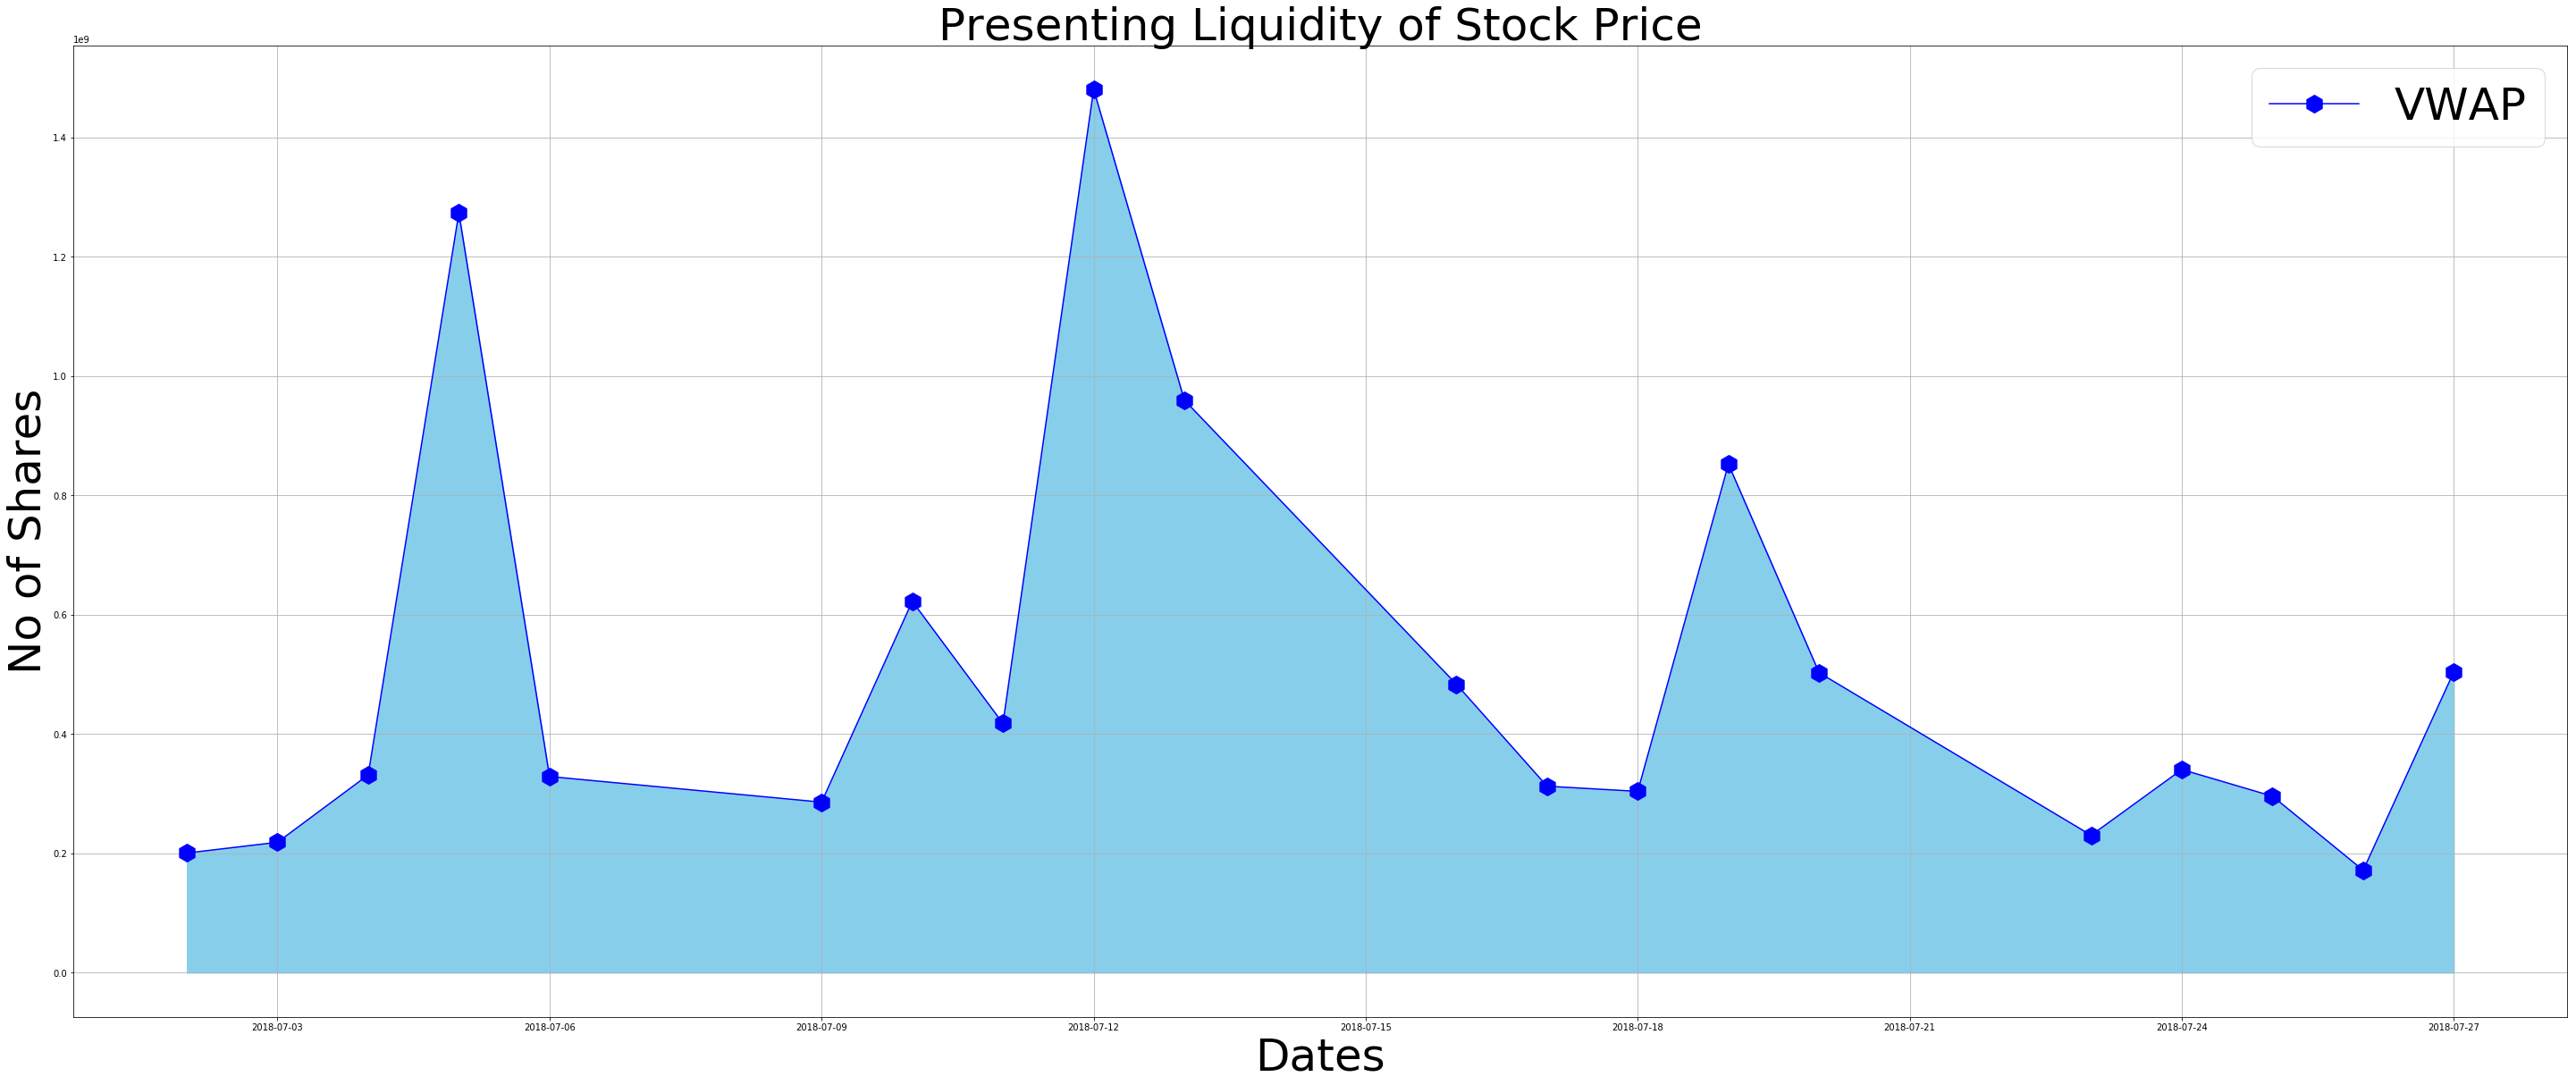

In [82]:
fig, wx = pt.subplots(figsize = (50,20))
wx.plot(REL_df.index, REL_df['TotalTurnover'], color = 'blue', label = 'VWAP', marker='h', markersize=20)
wx.set_xlabel('Dates',size=50)
wx.set_ylabel('No of Shares', size=50)
wx.set_title('Presenting Liquidity of Stock Price', size=50)
wx.fill_between(REL_df.index,REL_df['TotalTurnover'],color='skyblue')
# other parameters
wx.grid(True)
wx.legend()
pt.legend(prop={'size':50})

# Spread - Bid and Ask Price

# Moving Averages

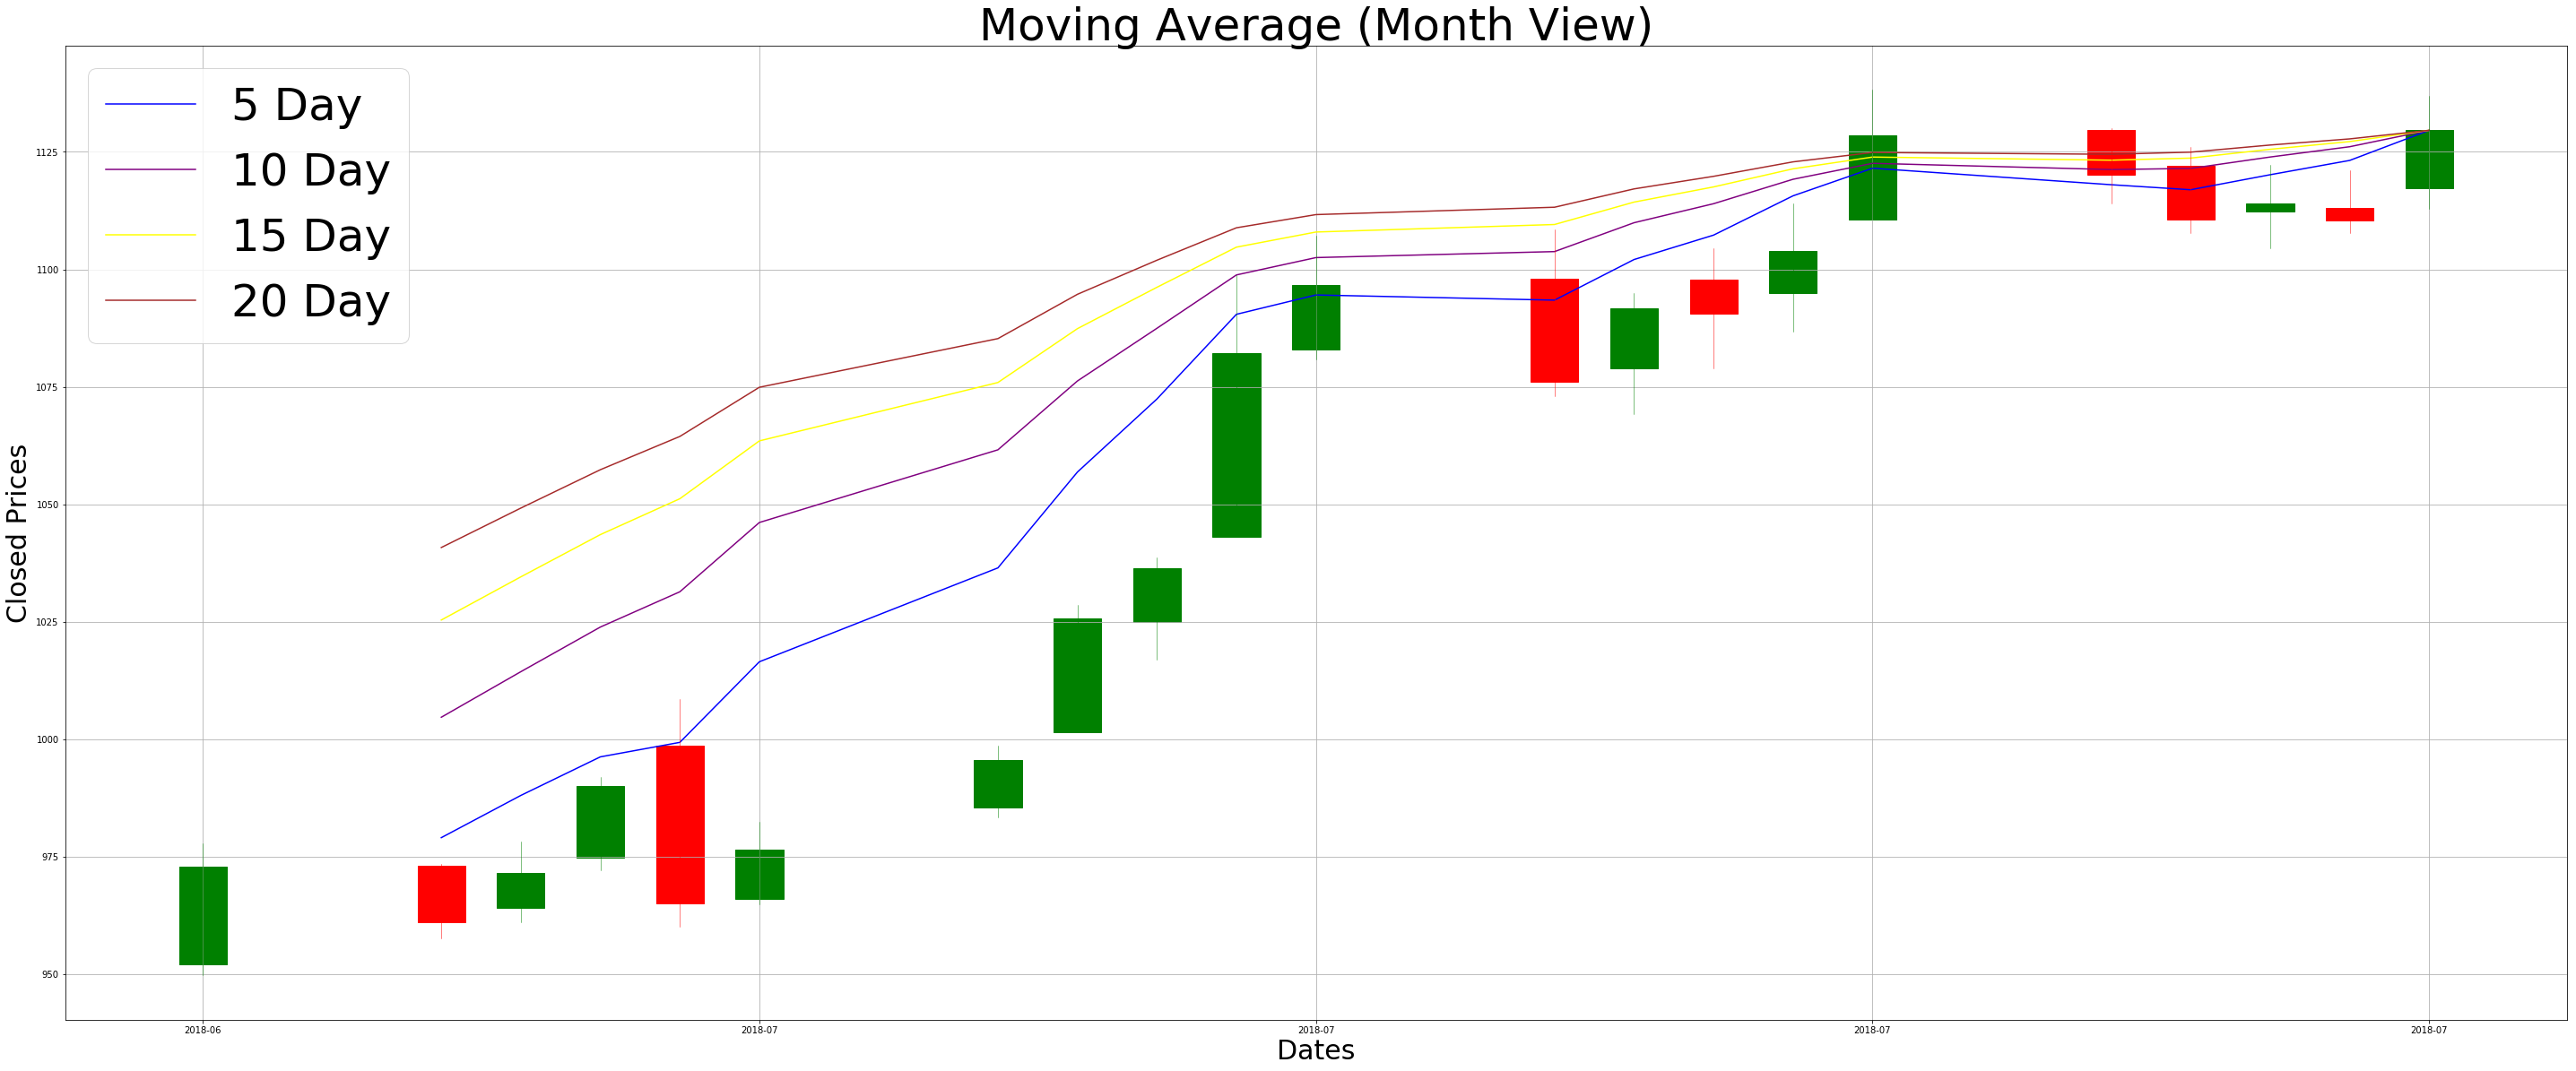

In [9]:
fig, ax = pt.subplots(figsize = (50,20))
REL_df['ema5'] = REL_df['Close'].ewm(span=5, adjust=False).mean()
REL_df['ema10'] = REL_df['Close'].ewm(span=10, adjust=False).mean()
REL_df['ema15'] = REL_df['Close'].ewm(span=15, adjust=False).mean()
REL_df['ema20'] = REL_df['Close'].ewm(span=20, adjust=False).mean()

REL_df = REL_df[REL_df.index > start]

# plot the moving average lines
ax.plot(REL_df.index, REL_df['ema5'], color = 'blue', label = '5 Day')
ax.plot(REL_df.index, REL_df['ema10'], color = 'purple', label = '10 Day')
ax.plot(REL_df.index, REL_df['ema15'], color = 'yellow', label = '15 Day')
ax.plot(REL_df.index, REL_df['ema20'], color = 'brown', label = '20 Day')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30, fontsize=30)
ax.set_ylabel('Closed Prices', size=30)
ax.set_title('Moving Average (Month View)', size=50)

# other parameters
ax.grid(True)
ax.legend()
pt.legend(prop={'size':50})

pt.show()

# Daily Return Analysis

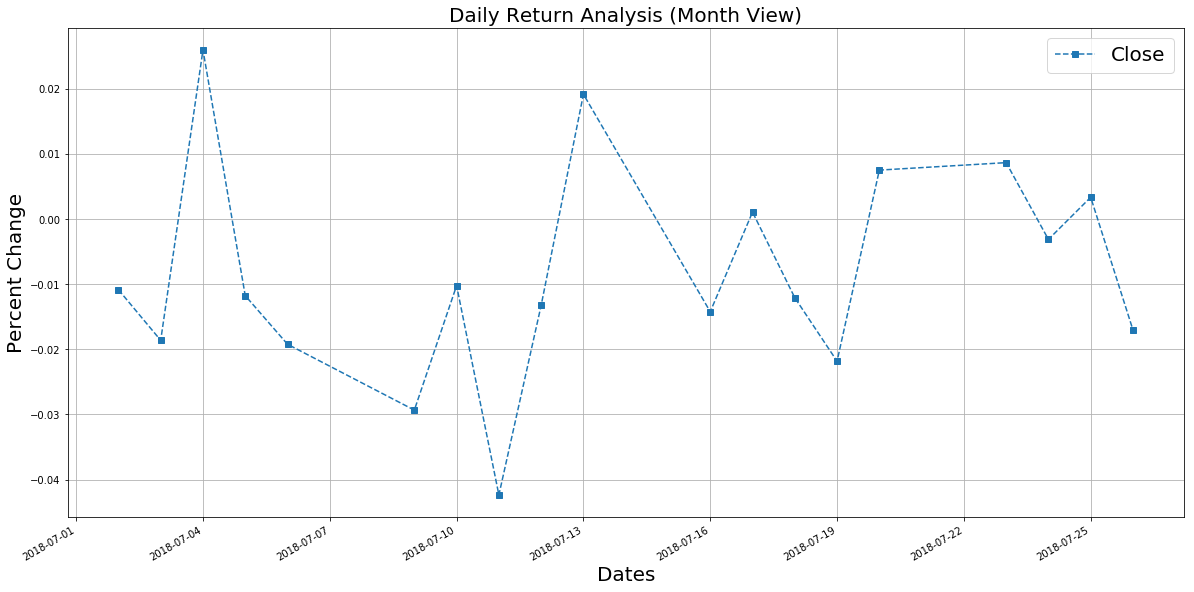

In [10]:
fig, cx = pt.subplots(figsize = (20,10))
(REL_df['Close'].pct_change()).plot( legend=True, linestyle='--', marker='s')
cx.set_xlabel('Dates',size=30, fontsize=20)
cx.set_ylabel('Percent Change', size=20)
cx.set_title('Daily Return Analysis (Month View)', size=20)

# other parameters
cx.grid(True)
cx.legend()
pt.legend(prop={'size':20})

# Factors affecting Close 